In [1]:
import numpy as np
import time
import numpy as np
from scipy.sparse.linalg import svds
from matplotlib import pyplot as plt

# Exploratory data analysis of trajectories

We have some big tensor of dimensions $\boldsymbol{X}=(50, 50, 801, 30)$. We flatten the spatial dimensions, so we end up with dimensions $(2500, 801, 30)$. 

To properly fetch the spatial modes we rearrange the matrix to have dimensions $2500 \times (801 \cdot 30)$.

We are stacking all realizations horizontally across time.

$$
\boldsymbol{X}=[\boldsymbol{X}^{(1)}(t_1) \boldsymbol{X}^{(1)}(t_2) \dots \boldsymbol{X}^{(1)}(t_{801}) \boldsymbol{X}^{(2)}(t_1) \dots \boldsymbol{X}^{(30)}(t_{801})]
$$

Here $\boldsymbol{X}^{(i)}(t_n) \in \mathbb{R}^{2500 \times 1}$. So now let's compute the first 100 modes, full SVD on this matrix would take hours...

In [5]:
# Extract data, and stack it.

data = np.load("simulation_data/rd_spiral/rd_spiral_mu_0.800_to_1.500_d1_0.01_d2_0.01_m_1_beta_1.1.npz")
u = data['u']
v = data['v']

t = u.shape[2]
flat_dim = u.shape[0] * u.shape[1]
realizations = u.shape[3]

u_flat = u.reshape((flat_dim, t, realizations))
v_flat = v.reshape((flat_dim, t, realizations))

In [20]:
u_flat = u_flat.reshape((flat_dim, t * realizations))
v_flat = v_flat.reshape((flat_dim, t * realizations))

full_uv = np.vstack((u_flat, v_flat))

start = time.time()
k = 20
U, S, VT = svds(full_uv, k=k, which='LM')
print(time.time() - start) 
# should I subtract the mean?

9.724552392959595


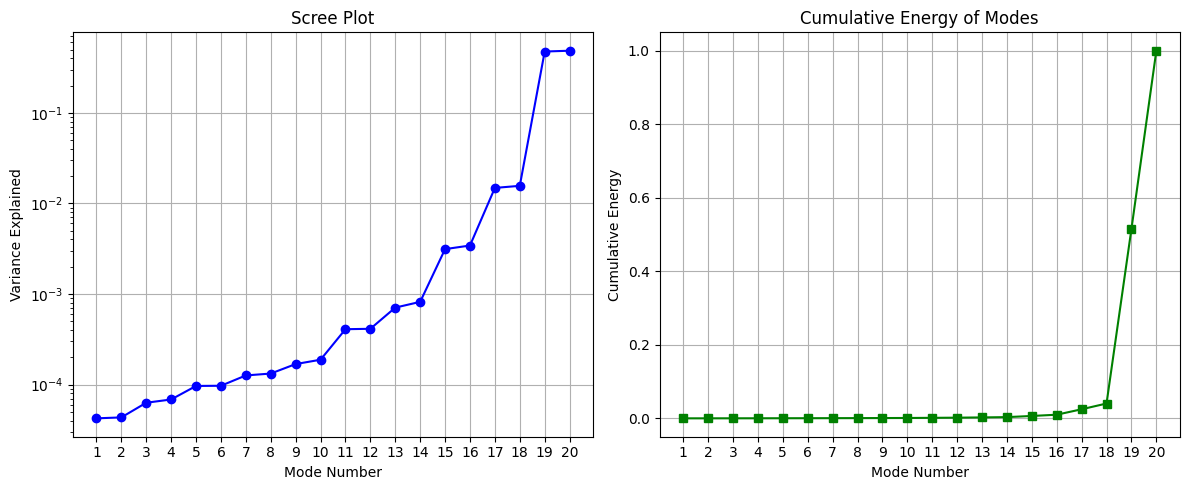

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Singular values
energy = S**2
total_energy = np.sum(energy)
explained_variance = energy / total_energy  # variance explained by each mode
cumulative_energy = np.cumsum(explained_variance)

modes = np.arange(1, len(S)+1)

plt.figure(figsize=(12,5))

# Scree plot
plt.subplot(1,2,1)
plt.plot(modes, explained_variance, 'o-', color='blue')
plt.xlabel('Mode Number')
plt.ylabel('Variance Explained')
plt.yscale('log')
plt.title('Scree Plot')
plt.grid(True)
plt.xticks(modes)  # Set x-axis ticks to integers

# Cumulative energy
plt.subplot(1,2,2)
plt.plot(modes, cumulative_energy, 's-', color='green')
plt.xlabel('Mode Number')
plt.ylabel('Cumulative Energy')
plt.title('Cumulative Energy of Modes')
plt.grid(True)
plt.xticks(modes)  # Set x-axis ticks to integers

plt.tight_layout()
plt.show()